In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
age_data = pd.read_csv("age_columns.csv")
age_data.head()

,Original Index,ECSAGE,SEDAGE,IRCIGAGE,IRALCAGE,IRMJAGE,IRCOCAGE,IRHERAGE,IRHALAGE,IRECSAGE,IRINHAGE,IRANLAGE,IRTRNAGE,IRSTMAGE,IRMTHAGE,PSYAGE2,SUMAGE,IEMAGE
0,0,991,991,19,991,991,991,991,991,991,991,991,991,991,991,991,991,991
1,1,17,991,14,13,14,16,991,17,17,991,991,16,991,991,16,14,16
2,2,991,991,14,16,991,991,991,991,991,991,991,991,991,991,991,991,991
3,3,991,991,16,18,991,991,991,991,991,991,991,991,991,991,991,991,991
4,4,991,991,14,18,991,991,991,991,991,991,991,991,991,991,991,991,991


Checking unique values across all columns

In [4]:
unique_values = []
for col in age_data.columns.drop('Original Index'):
    for i in age_data[col].unique():
        if i not in unique_values:
            unique_values.append(i)
unique_values.sort()
print(unique_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 80, 981, 985, 991, 994, 997, 998]


All values correspond to an age except 981, 985,991, 994, 997, and 998

<b> Code meanings </b>
<ol>
    <li> 981 -- Used in multiple columns. Represents "never used [column substance] logically assigned" </li>
    <li> 985 -- Used in multiple columns. Means "Bad data -- logically assigned".</li>
    <li> 991 -- Used frequently, represents "Never used [column substance]" </li>
    <li> 994 -- Represents "dont know"</li>
    <li> 997 -- Represents "refused" </li>
    <li> 998 -- Represents "blank"</li>
</ol>


Checking how often each code appears

In [5]:
problem_codes = [981,985,991,994,997,998]
for i in problem_codes:
    print ("Total for " + str(i) + ": " + str((age_data.drop('Original Index',axis=1) == i).sum().sum()))

Total for 981: 20
Total for 985: 13
Total for 991: 754090
Total for 994: 39
Total for 997: 20
Total for 998: 191


Checking where problem codes occur

In [6]:
drop_codes = problem_codes
drop_codes.remove(991)

In [7]:
x = age_data[~age_data.isin(drop_codes)]

In [8]:
x.isna().sum()

Original Index      5
ECSAGE             87
SEDAGE            196
IRCIGAGE            0
IRALCAGE            0
IRMJAGE             0
IRCOCAGE            0
IRHERAGE            0
IRHALAGE            0
IRECSAGE            0
IRINHAGE            0
IRANLAGE            0
IRTRNAGE            0
IRSTMAGE            0
IRMTHAGE            0
PSYAGE2             0
SUMAGE              0
IEMAGE              0
dtype: int64

Problem codes only occur in two columns which can be dropped

In [9]:
age_data = age_data.drop(['ECSAGE','SEDAGE'],axis=1)

Renaming remaining columns

In [11]:
age_data.columns

Index(['Original Index', 'IRCIGAGE', 'IRALCAGE', 'IRMJAGE', 'IRCOCAGE',
       'IRHERAGE', 'IRHALAGE', 'IRECSAGE', 'IRINHAGE', 'IRANLAGE', 'IRTRNAGE',
       'IRSTMAGE', 'IRMTHAGE', 'PSYAGE2', 'SUMAGE', 'IEMAGE'],
      dtype='object')

In [12]:
renames = {'IRCIGAGE':"Cigarrete Age",
          'IRALCAGE' : 'Alcohol Age',
          'IRMJAGE' : 'Marijuana Age',
          'IRCOCAGE': 'Cocaine Age',
          'IRHERAGE' : 'Heroin Age',
          'IRHALAGE': 'Hallucinogen Age',
          'IRECSAGE' : 'Ecstasy Age',
          'IRINHAGE' : 'Inhalent Age',
          'IRANLAGE' : 'Pain-Reliever Age',
          'IRTRNAGE' : 'Tranquelizer Age',
          'IRSTMAGE' : 'Stimulant Age',
          'IRMTHAGE' : 'Meth Age',
          'PSYAGE2' : 'Psychotherapeutics Age',
          'SUMAGE' : 'Any Illicit Drug Age',
          'IEMAGE' : 'Any Illicit Drug (except marijuana) Age'}
age_data = age_data.rename(mapper=renames,axis=1)

In [13]:
age_data.head()

,Original Index,Cigarrete Age,Alcohol Age,Marijuana Age,Cocaine Age,Heroin Age,Hallucinogen Age,Ecstasy Age,Inhalent Age,Pain-Reliever Age,Tranquelizer Age,Stimulant Age,Meth Age,Psychotherapeutics Age,Any Illicit Drug Age,Any Illicit Drug (except marijuana) Age
0,0,19,991,991,991,991,991,991,991,991,991,991,991,991,991,991
1,1,14,13,14,16,991,17,17,991,991,16,991,991,16,14,16
2,2,14,16,991,991,991,991,991,991,991,991,991,991,991,991,991
3,3,16,18,991,991,991,991,991,991,991,991,991,991,991,991,991
4,4,14,18,991,991,991,991,991,991,991,991,991,991,991,991,991


<h1>Visualization Functions</h1>

In [90]:
# #def single_use_visual(col_name,grouped=True):
def grouper(ele):
    if ele < 19:
        return "12 - 18"
    elif ele < 990:
        return "19 and up"
    else:
        return "Never used" 
# age_data['Cigarrete Age'].apply(lambda x: grouper(ele=x,name="Cigarretes")).value_counts().plot.pie()
# plt.show()
# def group_col(col_name):
#     return age_data[col_name].apply(grouper).value_counts().sort_index()

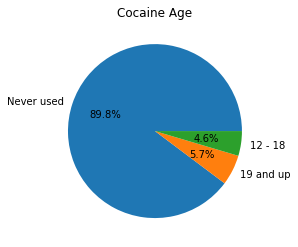

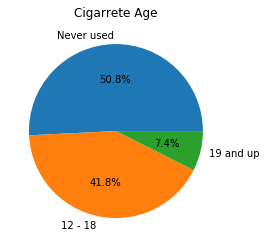

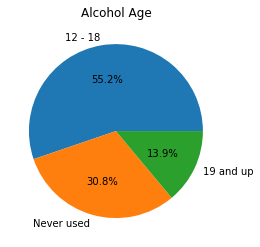

In [91]:
def single_pie_plots(col_names):
    for i in col_names:
        age_data[i].apply(grouper).value_counts().plot.pie(title=i,autopct='%1.1f%%')
        plt.axis('off')
        plt.show()
single_pie_plots(['Cocaine Age','Cigarrete Age','Alcohol Age'])

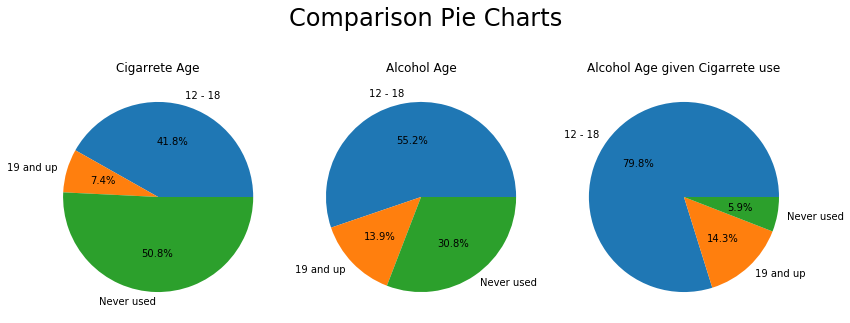

In [149]:
# fig,axes = plt.subplots(1,3,figsize=(10,10))
# axes[0].pie(age_data['Cigarrete Age'].apply(grouper).value_counts())
# axes[1].pie(age_data['Alcohol Age'].apply(grouper).value_counts())
# axes[2].pie(age_data['Cigarrete Age'].apply(grouper).value_counts())
# plt.tight_layout()
# plt.show()
def conditional_comparison(a,b):
    first = age_data[a].apply(grouper).value_counts().sort_index()
    second = age_data[b].apply(grouper).value_counts().sort_index()
    second_given_first = age_data[age_data[a]!=991][b].apply(grouper).value_counts().sort_index()
    fig,axes = plt.subplots(1,3,figsize=(12,12))
    axes[0].pie(first,labels=first.index,autopct='%1.1f%%')
    axes[0].set_title(a)
    axes[1].pie(second,labels=second.index,autopct='%1.1f%%')
    axes[1].set_title(b)
    axes[2].pie(second_given_first,labels=second_given_first.index,autopct='%1.1f%%')
    axes[2].set_title(b + " given " + a[:-4] + " use")
    plt.tight_layout()
    fig.suptitle('Comparison Pie Charts',y=0.72,fontsize=24)
    plt.show()
conditional_comparison('Cigarrete Age','Alcohol Age')

Todays plots
<ul>
    <li> older younger plot

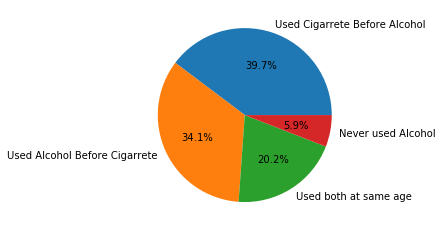

In [166]:
test = age_data[['Cigarrete Age','Alcohol Age']].copy()
def age_comparison_grouper(row,given,target):
    if row[target] == 991:
        return 'Never used ' + target[:-4]
    elif row[given] == row [target]:
        return 'Used both at same age'
    elif row[given] < row[target]:
        return 'Used ' + given[:-4] + ' Before ' + target[:-4]
    else:
        return 'Used ' + target[:-4] + ' Before ' + given[:-4]
# test = test[test['Cigarrete Age'] != 991]
# test['c'] = test.apply(lambda x: age_comparison_grouper(row=x,given='Cigarrete Age',target = 'Alcohol Age'),axis=1)
# test.head()
# test['c'].value_counts().plot.pie()
#step 1, assume smoker
#step 2, check for each in alcohol column, if never, higher, lower, or same
def age_comparison_plot(given,target):
    x = age_data[age_data[given] != 991] ##creating a temp df of just rows where given has no 991 values
    y = x.apply(lambda r: age_comparison_grouper(row=r,given=given,target=target),axis=1)
    y = y.value_counts()
    fig = plt.figure
    plt.pie(y,labels=y.index,autopct='%1.1f%%')
    plt.show()
age_comparison_plot('Cigarrete Age','Alcohol Age')

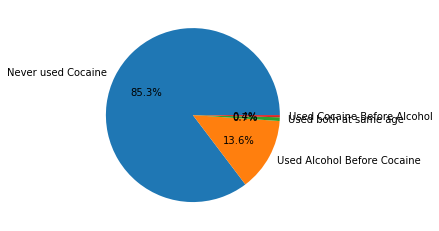

In [169]:
age_comparison_plot('Alcohol Age','Cocaine Age')

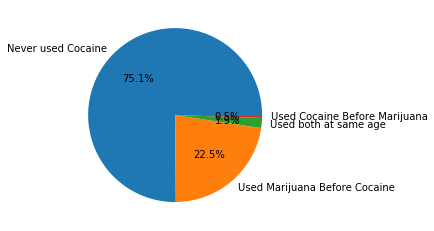

In [170]:
age_comparison_plot('Marijuana Age','Cocaine Age')

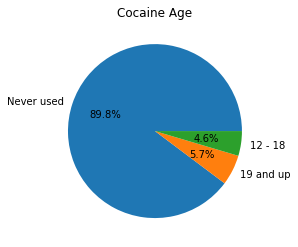

In [165]:
single_pie_plots(['Cocaine Age'])

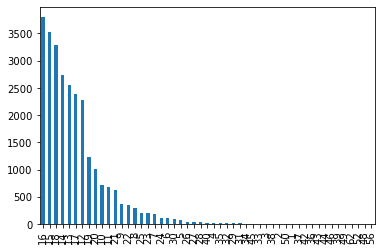

In [107]:
age_data[age_data['Cigarrete Age']!=991]['Cigarrete Age'].value_counts().plot.bar()

In [ ]:
def age_diff_label(df,a,b):
    x= df[df[a]!=911].copy()
    x = x[[a,b]].copy()
    x[c] = x.appl

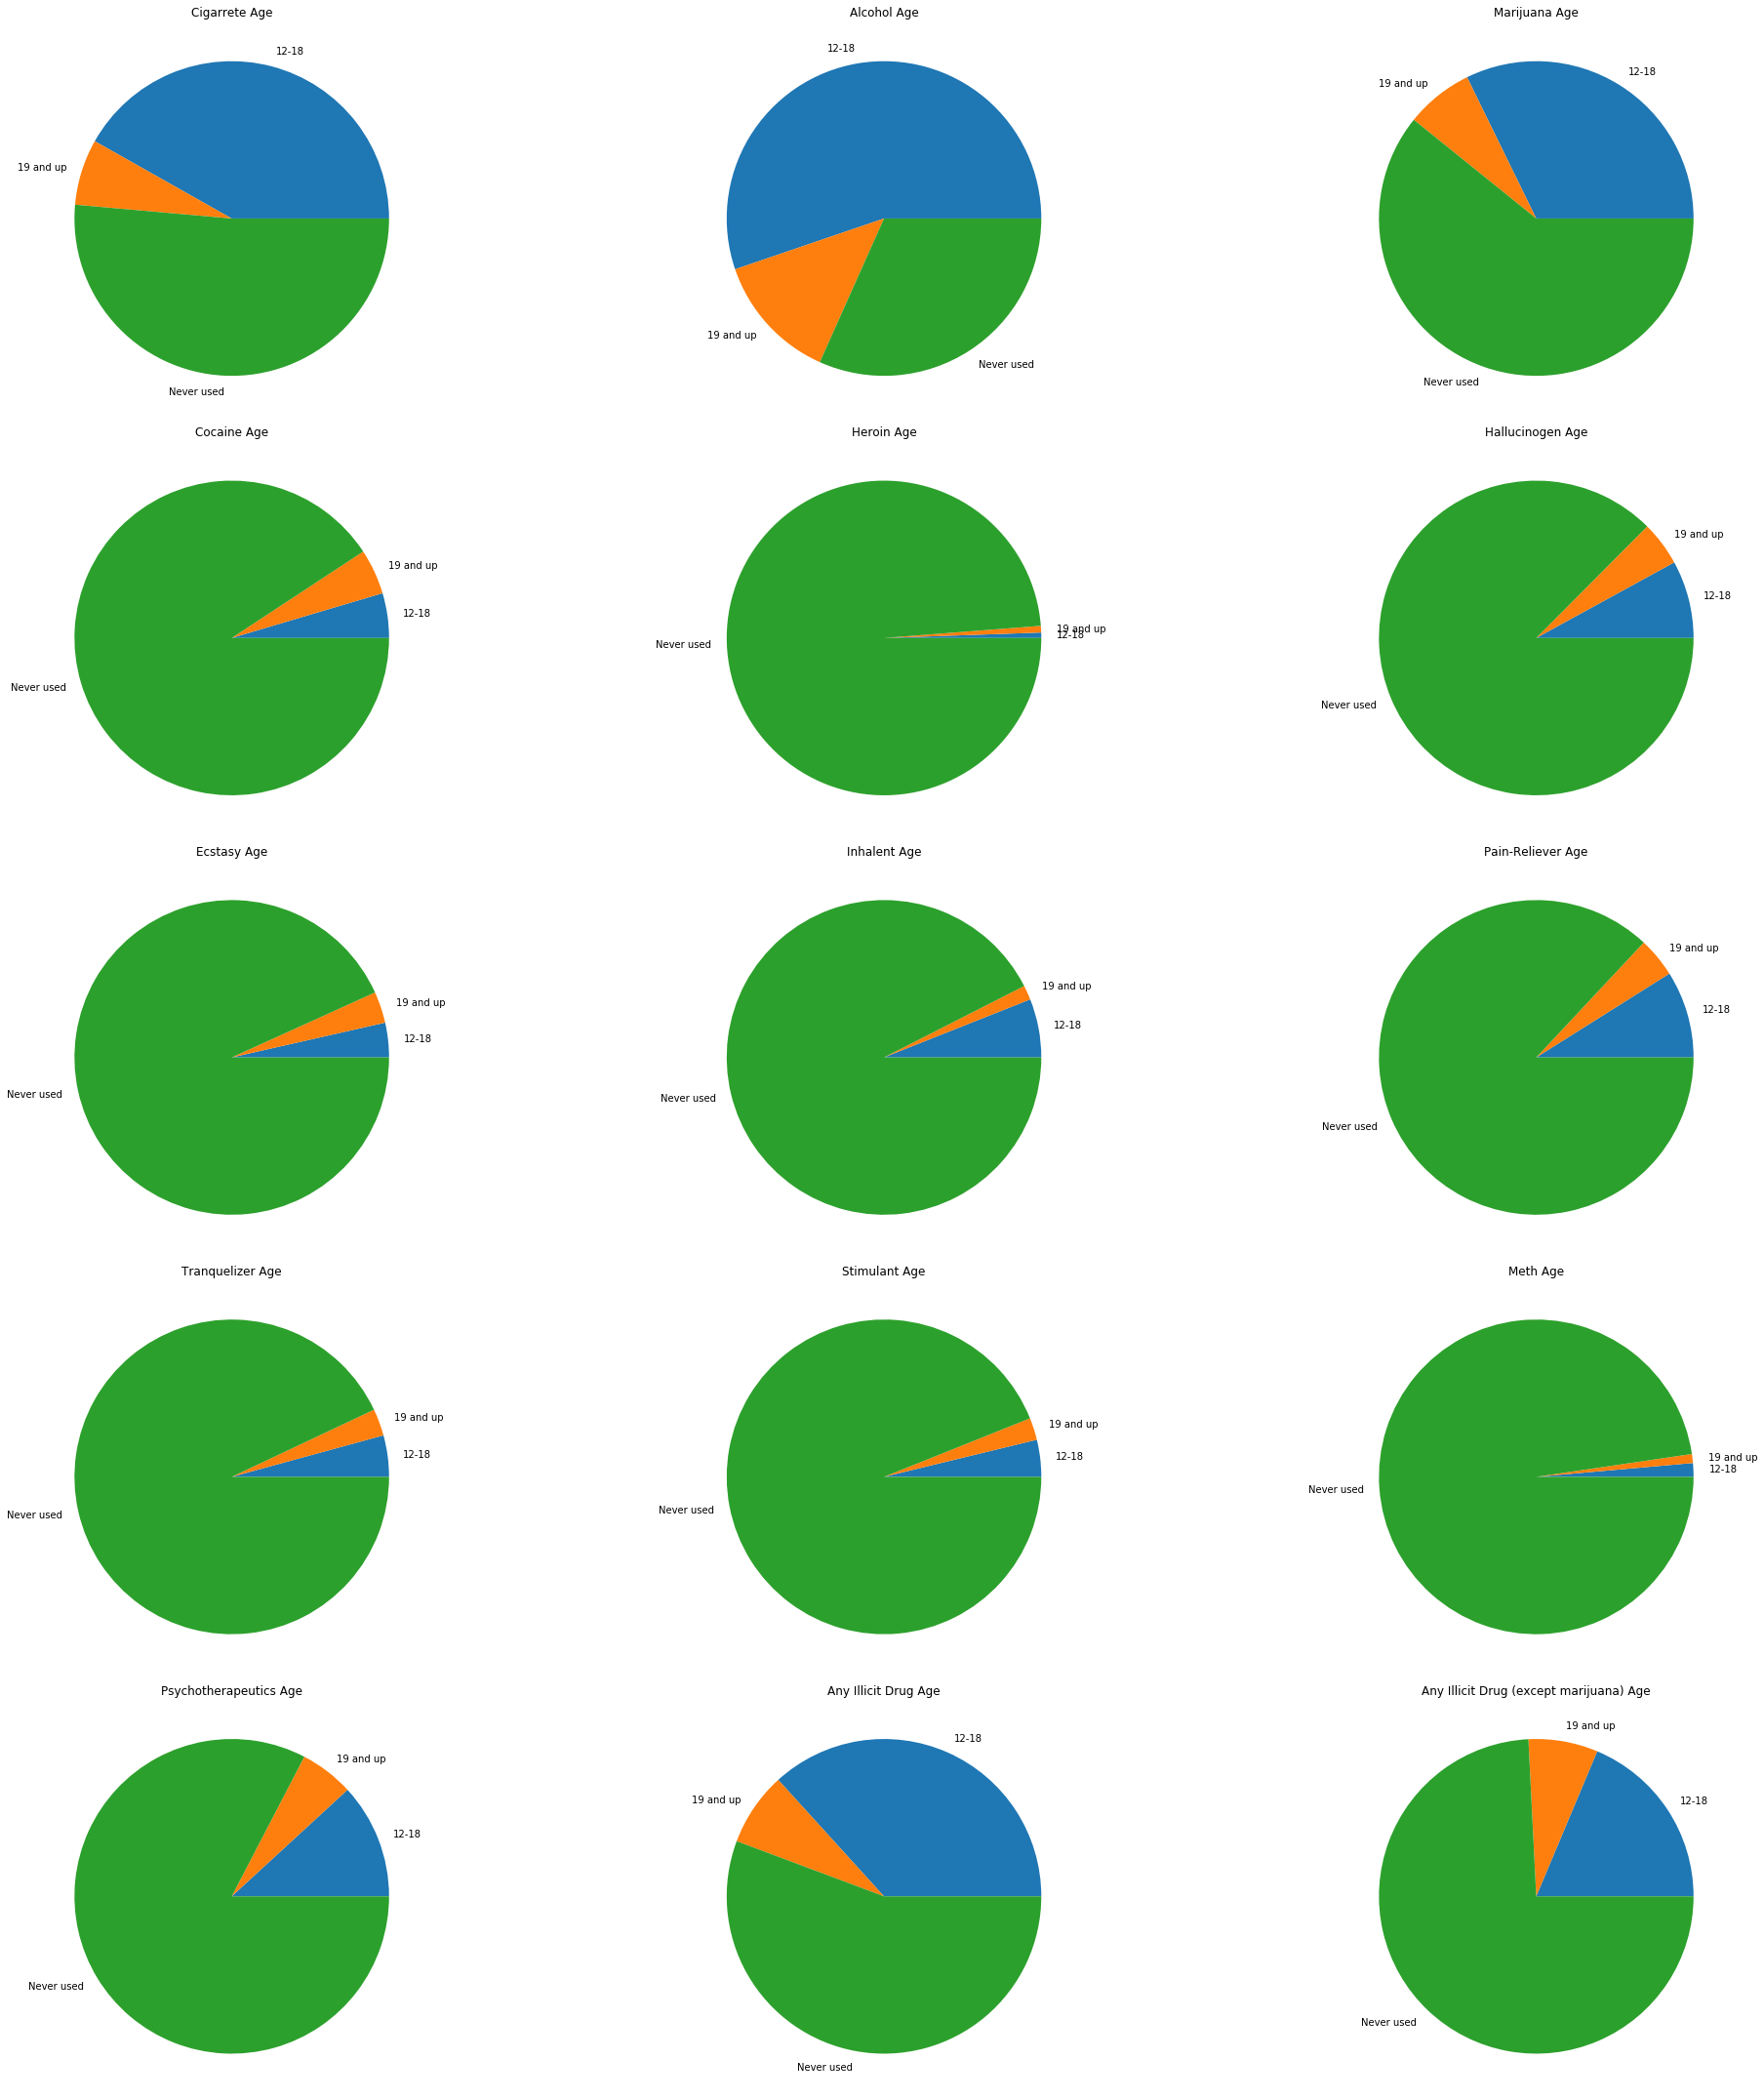

In [62]:
fig = plt.figure(figsize=(30,30),tight_layout=True)
labels = ['12-18','19 and up','Never used']
for i in range(15):
    title = age_data.columns.drop('Original Index')[i]
    axs = fig.add_subplot(5,3,i+1,title=title)
    axs.pie(age_data[title].apply(grouper).value_counts().sort_index(),labels=labels)
#plt.savefig('drug_charts.png')
plt.show()

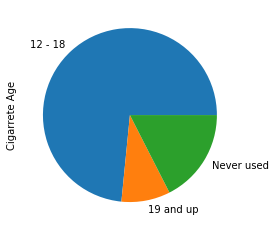

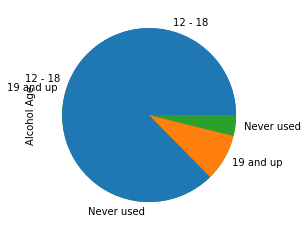

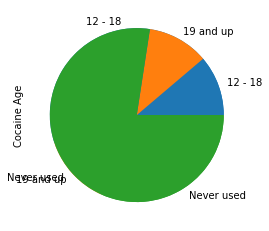

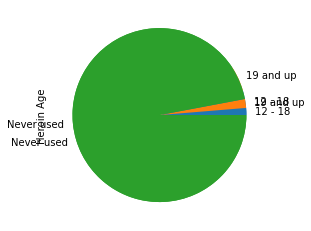

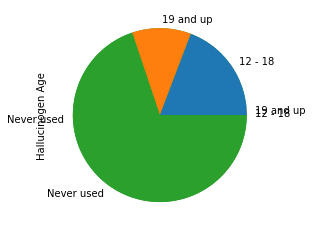

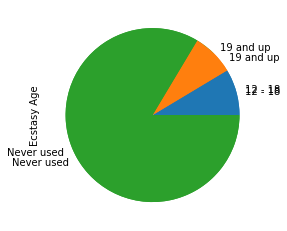

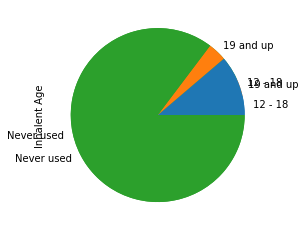

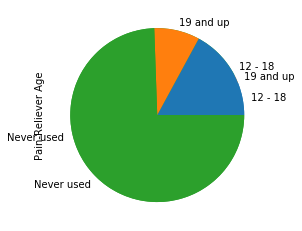

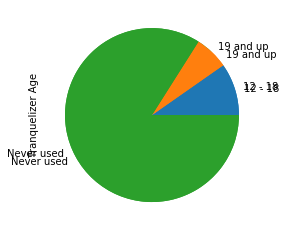

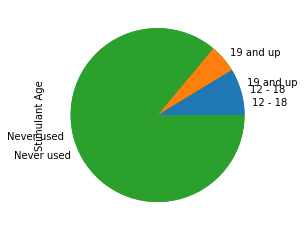

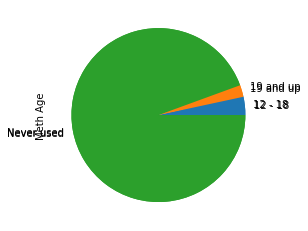

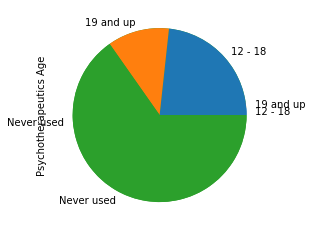

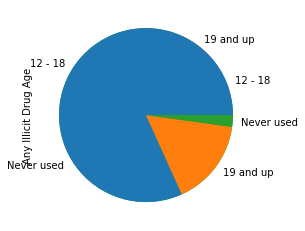

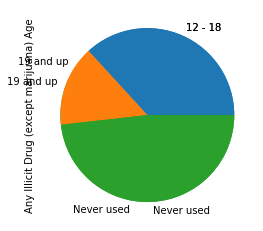

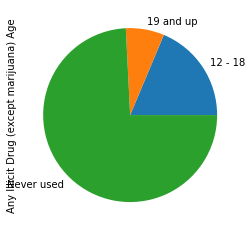

In [55]:
def a_given_b(a,b):
    filtered = age_data[age_data[a]<990].copy()
    filtered[b].apply(grouper).value_counts().sort_index().plot.pie()
    plt.show()
for i in age_data.columns.drop(['Marijuana Age','Original Index']):
    a_given_b('Marijuana Age',i)
    age_data[i].apply(grouper).value_z



In [49]:
age_data['Cigarrete Age'].apply(grouper).value_counts().sort_index()

12 - 18       23069
19 and up      3740
Never used    28351
Name: Cigarrete Age, dtype: int64

In [25]:
age_data[age_data['Cigarrete Age']<990]['Alcohol Age'].value_counts(normalize=True)[991]

0.05900117855038303

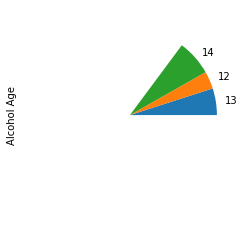

In [40]:
age_data['Alcohol Age'].value_counts(normalize=True)[[13,12,14]].plot.pie()